In [19]:
import tweepy
import re 
import pandas as pd


In [11]:
api_key = "b5EJoGKVQi8NzMOYTxj95iB5u"
api_secret = "AYssLuwM676vSMOCYLYaqVTY7PbsSEUnmPJUIAz2JrCu0Yeq6L"
access_token = "1959249686793256960-kFwJBWGVPkWOk3TPpHOTcHraGOS1E2"
access_token_secret = "BqYNOaPRyeNTPCFnWRygRFlhoYTOS3a9djKWdS6YfjLxS"
bearer_token = "AAAAAAAAAAAAAAAAAAAAACPw3gEAAAAAIrkyHnLn6gbgFor61NCR4rb9Erc%3D7aEAETjznHNr2yjGbdjKAGz5qhjsW3oRmEsfgqW2amXNwQfxHo"

# autenticação
client = tweepy.Client(bearer_token=bearer_token,
                       consumer_key=api_key,
                       consumer_secret=api_secret,
                       access_token=access_token,
                       access_token_secret=access_token_secret)

query = '(adultização OR "sexualização precoce" OR felca) lang:pt'
tweets = client.search_recent_tweets(query=query, max_results=90)

for t in tweets.data:
    print(t.text)

RT @leolinshumor: A gente não era contra a adultização dos jovens, pessoal?
RT @pqpcarlos: @updatecharts Felca virou presidente agora? o povo querendo que ele seja um Deus do poder executivo legislativo e judiciário…
RT @RafaelMaleves: o fato de chamarem o felca em vez de um psicólogo, pedagogo ou assistente social
RT @dinotiny_: @updatecharts e pode deixar anotado q se o felca continuar falando sobre esse tipo de assunto jaja ele perde toda relevância…
RT @flaviogarag: O Felca fodeu ele
Levantou outro tema e esqueceram ele preso
RT @Ly0nard0: Toda vez q o twitter idealiza alguém, lá na frente quebra a cara… o Felca não vai fugir a regra.
@eitapestevelho @tomilhoss Tua interpretação é um lixo msm, a adultizacao tá quando ADULTOS estão debatendo na internet se uma criança gosta de homem ou mulher sendo que é UMA CRIANÇA mds qual a dificuldade de entender o básico
RT @flaviogarag: O Felca fodeu ele
Levantou outro tema e esqueceram ele preso
RT @marsiglia_andre: Na surdina, enquanto todo 

In [14]:

def limpar_texto(texto):
    texto = re.sub(r"http\S+", "", texto)       # remove links
    texto = re.sub(r"@\w+", "", texto)          # remove menções
    texto = re.sub(r"#\w+", "", texto)          # remove hashtags
    texto = re.sub(r"RT\s+", "", texto)         # remove RT
    texto = re.sub(r"[^a-zA-ZÀ-ÿ\s]", "", texto) # remove caracteres especiais/números
    return texto.lower().strip()

In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer, WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')   # stemmer português
nltk.download('wordnet')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\itsbe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\itsbe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\itsbe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping stemmers\rslp.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\itsbe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
stop_words = set(stopwords.words("portuguese"))
stemmer = RSLPStemmer()
lemmatizer = WordNetLemmatizer()

def processar_texto(texto):
    # tokenização
    tokens = word_tokenize(texto, language="portuguese")

    # remove stopwords e pontuação
    tokens_limpos = [t for t in tokens if t not in stop_words and t not in string.punctuation]

    # stemming (reduz palavras à raiz)
    stems = [stemmer.stem(t) for t in tokens_limpos]

    # lematização (forma "dicionário")
    lemmas = [lemmatizer.lemmatize(t) for t in tokens_limpos]

    return {
        "tokens": tokens,
        "tokens_limpos": tokens_limpos,
        "stems": stems,
        "lemmas": lemmas
    }


In [18]:
tweets_processados = []

for t in tweets.data:
    texto_limpo = limpar_texto(t.text)
    resultado = processar_texto(texto_limpo)
    tweets_processados.append(resultado)

# exemplo: mostrar o 1º tweet processado
print("Original:", tweets.data[0].text)
print("Limpo:", limpar_texto(tweets.data[0].text))
print("Tokens:", tweets_processados[0]["tokens"])
print("Tokens limpos:", tweets_processados[0]["tokens_limpos"])
print("Stems:", tweets_processados[0]["stems"])
print("Lemmas:", tweets_processados[0]["lemmas"])


Original: RT @leolinshumor: A gente não era contra a adultização dos jovens, pessoal?
Limpo: a gente não era contra a adultização dos jovens pessoal
Tokens: ['a', 'gente', 'não', 'era', 'contra', 'a', 'adultização', 'dos', 'jovens', 'pessoal']
Tokens limpos: ['gente', 'contra', 'adultização', 'jovens', 'pessoal']
Stems: ['gent', 'contr', 'adult', 'jov', 'pessoal']
Lemmas: ['gente', 'contra', 'adultização', 'jovens', 'pessoal']


In [30]:
df = pd.DataFrame(tweets_processados)

# Criar coluna de texto limpo a partir dos lemmas
df["texto_para_sentimento"] = df["lemmas"].apply(lambda x: " ".join(eval(x)) if isinstance(x, str) else "")


df.to_csv("tweets_processados.csv", index=False, encoding="utf-8-sig")

print("✅ Tweets processados e salvos em tweets_processados.csv")
print(df.head())


✅ Tweets processados e salvos em tweets_processados.csv
                                              tokens  \
0  [a, gente, não, era, contra, a, adultização, d...   
1  [felca, virou, presidente, agora, o, povo, que...   
2  [o, fato, de, chamarem, o, felca, em, vez, de,...   
3  [e, pode, deixar, anotado, q, se, o, felca, co...   
4  [o, felca, fodeu, ele, levantou, outro, tema, ...   

                                       tokens_limpos  \
0      [gente, contra, adultização, jovens, pessoal]   
1  [felca, virou, presidente, agora, povo, queren...   
2  [fato, chamarem, felca, vez, psicólogo, pedago...   
3  [pode, deixar, anotado, q, felca, continuar, f...   
4  [felca, fodeu, levantou, outro, tema, esquecer...   

                                               stems  \
0                 [gent, contr, adult, jov, pessoal]   
1  [felc, vir, presid, agor, pov, quer, deu, pod,...   
2  [fat, cham, felc, vez, psicólog, pedagog, assi...   
3  [pod, deix, anot, q, felc, continu, fal, so

In [24]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer



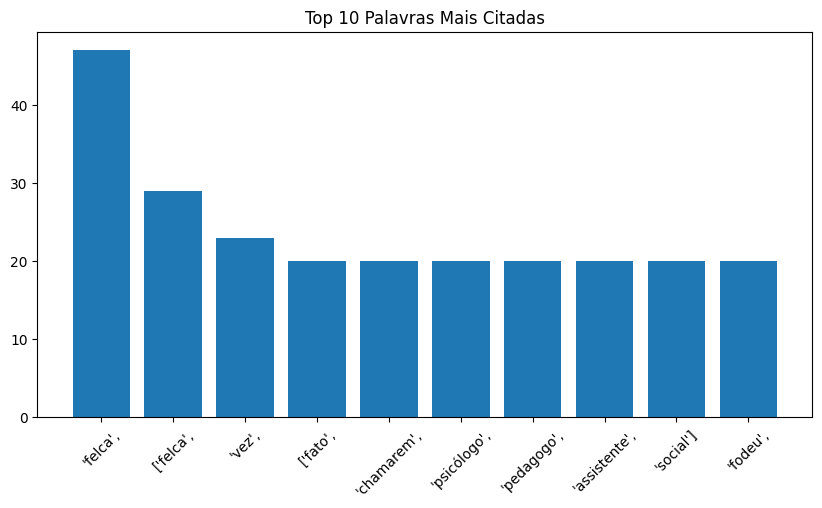

In [26]:
df = pd.read_csv("tweets_processados.csv")

# gráfico com top 10 palavras

todas_palavras = " ".join(df["lemmas"].dropna().astype(str))
tokens = todas_palavras.split()

contagem = Counter(tokens)
top10 = contagem.most_common(10)

# Plotar gráfico
palavras, freq = zip(*top10)
plt.figure(figsize=(10,5))
plt.bar(palavras, freq)
plt.title("Top 10 Palavras Mais Citadas")
plt.xticks(rotation=45)
plt.show()

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


✅ Tweets processados e salvos em CSV
                                              tokens  \
0  [a, gente, não, era, contra, a, adultização, d...   
1  [felca, virou, presidente, agora, o, povo, que...   
2  [o, fato, de, chamarem, o, felca, em, vez, de,...   
3  [e, pode, deixar, anotado, q, se, o, felca, co...   
4  [o, felca, fodeu, ele, levantou, outro, tema, ...   

                                       tokens_limpos  \
0      [gente, contra, adultização, jovens, pessoal]   
1  [felca, virou, presidente, agora, povo, queren...   
2  [fato, chamarem, felca, vez, psicólogo, pedago...   
3  [pode, deixar, anotado, q, felca, continuar, f...   
4  [felca, fodeu, levantou, outro, tema, esquecer...   

                                               stems  \
0                 [gent, contr, adult, jov, pessoal]   
1  [felc, vir, presid, agor, pov, quer, deu, pod,...   
2  [fat, cham, felc, vez, psicólog, pedagog, assi...   
3  [pod, deix, anot, q, felc, continu, fal, sobr,...   
4       [

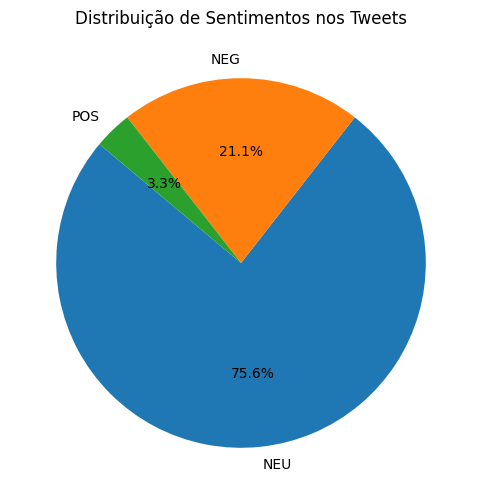

In [41]:
from pysentimiento import create_analyzer

analisador = create_analyzer(task="sentiment", lang="pt")

tweets_processados = []

for t in tweets.data:  # assume que tweets.data existe
    texto_limpo = limpar_texto(t.text)
    resultado = processar_texto(texto_limpo)
    resultado["texto_limpo"] = " ".join(resultado["tokens_limpos"])
    
    # Análise de sentimento
    sentimento = analisador.predict(resultado["texto_limpo"])
    resultado["sentimento"] = sentimento.output  # 'POS', 'NEU' ou 'NEG'
    
    tweets_processados.append(resultado)

df = pd.DataFrame(tweets_processados)
df.to_csv("tweets_processados_com_sentimento.csv", index=False, encoding="utf-8-sig")
print("✅ Tweets processados e salvos em CSV")
print(df.head())

sent_counts = df["sentimento"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sent_counts, labels=sent_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribuição de Sentimentos nos Tweets")
plt.show()


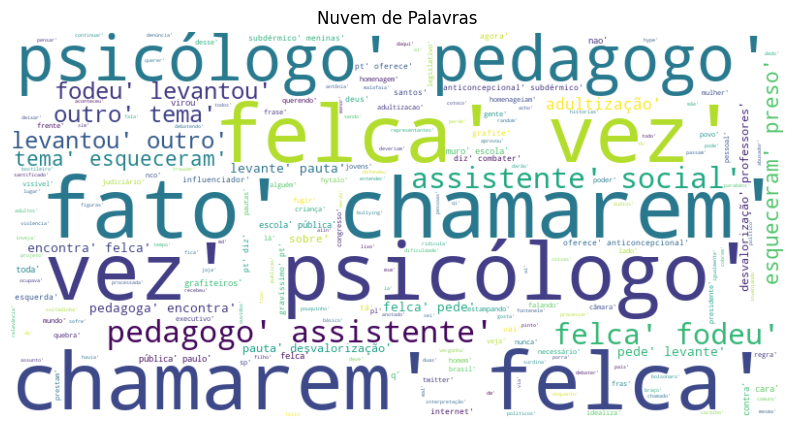

In [32]:
# NUVEM DE PALAVRAS

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(todas_palavras)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de Palavras")
plt.show()
